# 4. Ensemble_XGBoostCPU1
Kaggle score: 

Conclusion: 即使是只有两个结果，进行简单的加权平均，也可以使结果得到提升。本结论还需要进一步的实验验证。

## Run names

In [1]:
import time

project_name = 'ic_furniture2018'
step_name = 'Ensemble_XGBoostCPU1'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)
t0 = time.time()

run_name: ic_furniture2018_Ensemble_XGBoostCPU_20180425_162619


## Important params

In [2]:
import random
statistics_type = 'val_max'

random_num = random.randint(1, 10000)
print('random_num: ', random_num)

random_num:  2835


## Import PKGs

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

import os
import gc
import zipfile
import h5py
import pickle
import math
from PIL import Image
import shutil

from tqdm import tqdm
from multiprocessing import cpu_count
cpu_amount = cpu_count()

from sklearn.metrics import confusion_matrix, accuracy_score

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Project folders

In [4]:
cwd = os.getcwd()
input_folder = os.path.join(cwd, 'input')
output_folder = os.path.join(cwd, 'output')
model_folder = os.path.join(cwd, 'model')
feature_folder = os.path.join(cwd, 'feature')
post_pca_feature_folder = os.path.join(cwd, 'post_pca_feature')
log_folder = os.path.join(cwd, 'log')
print('input_folder: \t\t\t%s' % input_folder)
print('output_folder: \t\t\t%s' % output_folder)
print('model_folder: \t\t\t%s' % model_folder)
print('feature_folder: \t\t%s' % feature_folder)
print('post_pca_feature_folder: \t%s' % post_pca_feature_folder)
print('log_folder: \t\t\t%s' % log_folder)

org_train_folder = os.path.join(input_folder, 'org_train')
org_val_folder = os.path.join(input_folder, 'org_val')
org_test_folder = os.path.join(input_folder, 'org_test')
train_folder = os.path.join(input_folder, 'data_train')
val_folder = os.path.join(input_folder, 'data_val')
test_folder = os.path.join(input_folder, 'data_test')
test_sub_folder = os.path.join(test_folder, 'test')

if not os.path.exists(post_pca_feature_folder):
    os.mkdir(post_pca_feature_folder)
    print('Create folder: %s' % post_pca_feature_folder)

train_json_file = os.path.join(input_folder, 'train.json')
val_json_file = os.path.join(input_folder, 'validation.json')
test_json_file = os.path.join(input_folder, 'test.json')
print('\ntrain_json_file: \t\t%s' % train_json_file)
print('val_json_file: \t\t\t%s' % val_json_file)
print('test_json_file: \t\t%s' % test_json_file)

train_csv_file = os.path.join(input_folder, 'train.csv')
val_csv_file = os.path.join(input_folder, 'validation.csv')
test_csv_file = os.path.join(input_folder, 'test.csv')
print('\ntrain_csv_file: \t\t%s' % train_csv_file)
print('val_csv_file: \t\t\t%s' % val_csv_file)
print('test_csv_file: \t\t\t%s' % test_csv_file)

sample_submission_csv_file = os.path.join(input_folder, 'sample_submission_randomlabel.csv')
print('\nsample_submission_csv_file: \t%s' % sample_submission_csv_file)

input_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input
output_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/output
model_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/model
feature_folder: 		/data1/kaggle/imaterialist-challenge-furniture-2018/feature
post_pca_feature_folder: 	/data1/kaggle/imaterialist-challenge-furniture-2018/post_pca_feature
log_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/log

train_json_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/train.json
val_json_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/validation.json
test_json_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/test.json

train_csv_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/train.csv
val_csv_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/validation.csv
test_csv_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/test.csv


## Preview data

In [5]:
train_csv = pd.read_csv(train_csv_file)
print('train_csv.shape is {0}.'.format(train_csv.shape))
display(train_csv.head(2))

val_csv = pd.read_csv(val_csv_file)
print('val_csv.shape is {0}.'.format(val_csv.shape))
display(val_csv.head(2))

test_csv = pd.read_csv(test_csv_file)
print('test_csv.shape is {0}.'.format(test_csv.shape))
display(test_csv.head(2))

test_csv = pd.read_csv(test_csv_file)
print('test_csv.shape is {0}.'.format(test_csv.shape))
display(test_csv.head(2))

sample_submission_csv = pd.read_csv(sample_submission_csv_file)
print('sample_submission_csv.shape is {0}.'.format(sample_submission_csv.shape))
display(sample_submission_csv.head(2))

train_csv.shape is (194828, 3).


,image_id,label_id,url
0,1,5,https://img13.360buyimg.com/imgzone/jfs/t2857/...
1,2,5,http://www.tengdakeli.cn/350/timg01/uploaded/i...


val_csv.shape is (6400, 3).


,image_id,label_id,url
0,1,38,http://www.ghs.net/public/images/fb/3d/51/3beb...
1,2,63,https://img.alicdn.com/imgextra/TB2chFei9YH8KJ...


test_csv.shape is (12800, 2).


,image_id,url
0,1,https://img13.360buyimg.com/imgzone/jfs/t13174...
1,2,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg


test_csv.shape is (12800, 2).


,image_id,url
0,1,https://img13.360buyimg.com/imgzone/jfs/t13174...
1,2,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg


sample_submission_csv.shape is (12800, 2).


,id,predicted
0,1,57
1,2,74


In [6]:
train_id = train_csv['image_id']
train_label_id = train_csv['label_id']

id_2_train_label_id_dict = dict(zip(train_id, train_label_id))
print('len(id_2_train_label_id_dict)=%d' % len(id_2_train_label_id_dict))

index = 0
print('id: %s, \tlandmark_id:%s' % (train_id[index], id_2_train_label_id_dict[train_id[index]]))
index = 1
print('id: %s, \tlandmark_id:%s' % (train_id[index], id_2_train_label_id_dict[train_id[index]]))

image_file = '%s_%s.jpg' % (train_id[index], id_2_train_label_id_dict[train_id[index]])
print(image_file)

len(id_2_train_label_id_dict)=194828
id: 1, 	landmark_id:5
id: 2, 	landmark_id:5
2_5.jpg


In [7]:
val_id = val_csv['image_id']
val_label_id = val_csv['label_id']

id_2_val_label_id_dict = dict(zip(val_id, val_label_id))
print('len(id_2_val_label_id_dict)=%d' % len(id_2_val_label_id_dict))

index = 0
print('id: %s, \tlandmark_id:%s' % (val_id[index], id_2_val_label_id_dict[val_id[index]]))
index = 1
print('id: %s, \tlandmark_id:%s' % (val_id[index], id_2_val_label_id_dict[val_id[index]]))

image_file = '%s_%s.jpg' % (val_id[index], id_2_val_label_id_dict[val_id[index]])
print(image_file)

len(id_2_val_label_id_dict)=6400
id: 1, 	landmark_id:38
id: 2, 	landmark_id:63
2_63.jpg


In [8]:
test_id = test_csv['image_id']

index = 0
print('id: %s' % (test_id[index]))
index = 1
print('id: %s' % (test_id[index]))

image_file = '%s.jpg' % (test_id[index])
print(image_file)

id: 1
id: 2
2.jpg


## Data Generator

In [9]:
from keras.preprocessing.image import ImageDataGenerator

test_gen = ImageDataGenerator()
data_test_path = os.path.join(input_folder, 'data_test')

image_size = 299
width = height = 299
target_size = (width, height)
batch_size = 128

test_generator = test_gen.flow_from_directory(data_test_path, target_size, shuffle=False, batch_size=batch_size)

Using TensorFlow backend.


Found 12652 images belonging to 1 classes.


## Load predict probability files

In [10]:
ori_proba_files = [
    { 'file_name': 'proba_ic_furniture2018_Train-Predict_Mix3model_20180415_053404_7941.p'},
    { 'file_name': 'proba_ic_furniture2018_Train-Predict_Mix3model_20180415_061203_7987.p'},
    { 'file_name': 'proba_ic_furniture2018_Train-Predict_Mix3model_20180415_070425_8115.p'},
    { 'file_name': 'proba_ic_furniture2018_Train-Predict_Mix3model_20180415_071659_8120.p'},
    { 'file_name': 'proba_ic_furniture2018_Train-Predict_Mix3model_20180415_072816_8131.p'},
    { 'file_name': 'proba_ic_furniture2018_Train-Predict_Mix3model_20180415_075023_8175.p'},
    { 'file_name': 'proba_ic_furniture2018_Train-Predict_Mix3model_20180415_080533_8136.p'},
    { 'file_name': 'proba_ic_furniture2018_Train-Predict_Mix3model_20180415_081948_8214.p'},
    { 'file_name': 'proba_ic_furniture2018_TrainPredict_FineTune_20180417_170937_8341.p', 'kaggle_score': 0.17812},
    { 'file_name': 'proba_ic_furniture2018_TrainPredict_FineTune_20180418_130955_8303.p', 'kaggle_score': 0.17890},
    { 'file_name': 'proba_ic_furniture2018_TrainPredict_FineTune_20180422_041707_8300.p', 'kaggle_score': 0.17994},
    { 'file_name': 'proba_ic_furniture2018_TrainPredict_FineTune_20180423_134043_8426.p', 'kaggle_score': 0.17395},
    { 'file_name': 'proba_ic_furniture2018_TrainPredict_FineTune_20180424_143948_8278.p', 'kaggle_score': 0.19479},
]

for file in ori_proba_files:
    if os.path.exists(os.path.join(model_folder, file['file_name'])):
        print('File exists: %s' % file['file_name'])
    else:
        print('***File do not exists: %s' % file['file_name'])

File exists: proba_ic_furniture2018_Train-Predict_Mix3model_20180415_053404_7941.p
File exists: proba_ic_furniture2018_Train-Predict_Mix3model_20180415_061203_7987.p
File exists: proba_ic_furniture2018_Train-Predict_Mix3model_20180415_070425_8115.p
File exists: proba_ic_furniture2018_Train-Predict_Mix3model_20180415_071659_8120.p
File exists: proba_ic_furniture2018_Train-Predict_Mix3model_20180415_072816_8131.p
File exists: proba_ic_furniture2018_Train-Predict_Mix3model_20180415_075023_8175.p
File exists: proba_ic_furniture2018_Train-Predict_Mix3model_20180415_080533_8136.p
File exists: proba_ic_furniture2018_Train-Predict_Mix3model_20180415_081948_8214.p
File exists: proba_ic_furniture2018_TrainPredict_FineTune_20180417_170937_8341.p
File exists: proba_ic_furniture2018_TrainPredict_FineTune_20180418_130955_8303.p
File exists: proba_ic_furniture2018_TrainPredict_FineTune_20180422_041707_8300.p
File exists: proba_ic_furniture2018_TrainPredict_FineTune_20180423_134043_8426.p
File exists:

In [11]:
# %%time
def save_proba(y_train_proba, y_train, y_val_proba, y_val, y_test_proba, test_filenames, file_name):
    test_filenames = [n.encode('utf8') for n in test_filenames]
    print(test_filenames[:10])
    if os.path.exists(file_name):
        os.remove(file_name)
        print('File removed: \t%s' % file_name)
    with h5py.File(file_name) as h:
        h.create_dataset('y_train_proba', data=y_train_proba)
        h.create_dataset('y_train', data=y_train)
        h.create_dataset('y_val_proba', data=y_val_proba)
        h.create_dataset('y_val', data=y_val)
        h.create_dataset('y_test_proba', data=y_test_proba)
        h.create_dataset('test_filenames', data=test_filenames)
    print('File saved: %s' % file_name)

def load_proba(file_name):
    with h5py.File(file_name, 'r') as h:
        y_train_proba = np.array(h['y_train_proba'])
        y_train = np.array(h['y_train'])
        y_val_proba = np.array(h['y_val_proba'])
        y_val = np.array(h['y_val'])
        y_test_proba = np.array(h['y_test_proba'])
        test_filenames = np.array(h['test_filenames'])
    print('File loaded: %s' % file_name)
    test_filenames = [n.decode('utf8') for n in test_filenames]
#     print(test_filenames[:10])
    return y_train_proba, y_train, y_val_proba, y_val, y_test_proba, test_filenames

def get_acc(y_pred, y_proba):
    max_indexes = np.argmax(y_proba, -1)
    return accuracy_score(y_pred ,max_indexes)


y_train_probas = []
y_trains = []
y_val_probas = []
y_vas = []
y_test_probas = []
for file in ori_proba_files:
    y_proba_file = os.path.join(model_folder, file['file_name'])
    y_train_proba, y_train, y_val_proba, y_val, y_test_proba, test_filenames = load_proba(y_proba_file)
#     print(y_train_proba.shape)
#     print(y_train.shape)
#     print(y_val_proba.shape)
#     print(y_val.shape)
#     print(y_test_proba.shape)
#     print(len(test_filenames))
    y_train_probas.append(y_train_proba)
    y_val_probas.append(y_val_proba)
    y_test_probas.append(y_test_proba)
    file['train_acc'] = get_acc(y_train, y_train_proba)
    file['val_acc'] = get_acc(y_val, y_val_proba)

for f in ori_proba_files:
    print(f['file_name'], '%.4f' % f['train_acc'], '%.4f' % f['val_acc'])

File loaded: /data1/kaggle/imaterialist-challenge-furniture-2018/model/proba_ic_furniture2018_Train-Predict_Mix3model_20180415_053404_7941.p
File loaded: /data1/kaggle/imaterialist-challenge-furniture-2018/model/proba_ic_furniture2018_Train-Predict_Mix3model_20180415_061203_7987.p
File loaded: /data1/kaggle/imaterialist-challenge-furniture-2018/model/proba_ic_furniture2018_Train-Predict_Mix3model_20180415_070425_8115.p
File loaded: /data1/kaggle/imaterialist-challenge-furniture-2018/model/proba_ic_furniture2018_Train-Predict_Mix3model_20180415_071659_8120.p
File loaded: /data1/kaggle/imaterialist-challenge-furniture-2018/model/proba_ic_furniture2018_Train-Predict_Mix3model_20180415_072816_8131.p
File loaded: /data1/kaggle/imaterialist-challenge-furniture-2018/model/proba_ic_furniture2018_Train-Predict_Mix3model_20180415_075023_8175.p
File loaded: /data1/kaggle/imaterialist-challenge-furniture-2018/model/proba_ic_furniture2018_Train-Predict_Mix3model_20180415_080533_8136.p
File loaded: 

## Get basic statistical data

In [12]:
ensemble_res = {}

In [13]:
# %%time
def get_mean(probas):
    probas_newaxises = []
    for p in probas:
        print('*', end='')
        probas_newaxises.append(p[:, :, np.newaxis])
    probas_newaxis = np.concatenate(probas_newaxises, axis=-1)
    probas_mean = np.mean(probas_newaxis, axis=-1)
    print('probas_mean.shape: \t', probas_mean.shape)
    return probas_mean

ensemble_res['train_mean'] = get_acc(y_train ,get_mean(y_train_probas))
ensemble_res['val_mean'] = get_acc(y_val ,get_mean(y_val_probas))
y_test_proba_mean = get_mean(y_test_probas)

# print(ensemble_res)

*************probas_mean.shape: 	 (191261, 128)
*************probas_mean.shape: 	 (6301, 128)
*************probas_mean.shape: 	 (12652, 128)


In [14]:
# %%time
def get_min(probas):
    probas_newaxises = []
    for p in probas:
        print('*', end='')
        probas_newaxises.append(p[:, :, np.newaxis])
    probas_newaxis = np.concatenate(probas_newaxises, axis=-1)
    probas_min = np.min(probas_newaxis, axis=-1)
    print('probas_min.shape: \t', probas_min.shape)
    return probas_min

ensemble_res['train_min'] = get_acc(y_train ,get_min(y_train_probas))
ensemble_res['val_min'] = get_acc(y_val ,get_min(y_val_probas))
y_test_proba_min = get_min(y_test_probas)

# print(ensemble_res)

*************probas_min.shape: 	 (191261, 128)
*************probas_min.shape: 	 (6301, 128)
*************probas_min.shape: 	 (12652, 128)


In [15]:
# %%time
def get_max(probas):
    probas_newaxises = []
    for p in probas:
        print('*', end='')
        probas_newaxises.append(p[:, :, np.newaxis])
    probas_newaxis = np.concatenate(probas_newaxises, axis=-1)
    probas_max = np.max(probas_newaxis, axis=-1)
    print('probas_max.shape: \t', probas_max.shape)
    return probas_max

ensemble_res['train_max'] = get_acc(y_train ,get_max(y_train_probas))
ensemble_res['val_max'] = get_acc(y_val ,get_max(y_val_probas))
y_test_proba_max = get_max(y_test_probas)

# print(ensemble_res)

*************probas_max.shape: 	 (191261, 128)
*************probas_max.shape: 	 (6301, 128)
*************probas_max.shape: 	 (12652, 128)


In [16]:
# %%time
def get_median(probas):
    probas_newaxises = []
    for p in probas:
        print('*', end='')
        probas_newaxises.append(p[:, :, np.newaxis])
    probas_newaxis = np.concatenate(probas_newaxises, axis=-1)
    probas_median = np.median(probas_newaxis, axis=-1)
    print('probas_median.shape: \t', probas_median.shape)
    return probas_median

ensemble_res['train_median'] = get_acc(y_train ,get_median(y_train_probas))
ensemble_res['val_median'] = get_acc(y_val ,get_median(y_val_probas))
y_test_proba_median = get_median(y_test_probas)

# print(ensemble_res)

*************probas_median.shape: 	 (191261, 128)
*************probas_median.shape: 	 (6301, 128)
*************probas_median.shape: 	 (12652, 128)


In [17]:
for i, key in enumerate(ensemble_res.keys()):
    if i % 2 == 0:
        print('%s  \t%.4f' % (key, ensemble_res[key]), end='\t')
    else:
        print('%s  \t%.4f' % (key, ensemble_res[key]))

train_mean  	0.9714	val_mean  	0.8610
train_min  	0.9752	val_min  	0.8570
train_max  	0.9759	val_max  	0.8581
train_median  	0.9668	val_median  	0.8518


## XGBoost Ensemble

In [18]:
y_train_probas_sta = np.concatenate([
    get_mean(y_train_probas), 
    get_min(y_train_probas), 
    get_max(y_train_probas), 
    get_median(y_train_probas)
], axis=-1)
print(y_train_probas_sta.shape)

y_val_probas_sta = np.concatenate([
    get_mean(y_val_probas), 
    get_min(y_val_probas), 
    get_max(y_val_probas), 
    get_median(y_val_probas)
], axis=-1)
print(y_val_probas_sta.shape)

y_test_probas_sta = np.concatenate([
    get_mean(y_test_probas), 
    get_min(y_test_probas), 
    get_max(y_test_probas), 
    get_median(y_test_probas)
], axis=-1)
print(y_test_probas_sta.shape)

*************probas_mean.shape: 	 (191261, 128)
*************probas_min.shape: 	 (191261, 128)
*************probas_max.shape: 	 (191261, 128)
*************probas_median.shape: 	 (191261, 128)
(191261, 512)
*************probas_mean.shape: 	 (6301, 128)
*************probas_min.shape: 	 (6301, 128)
*************probas_max.shape: 	 (6301, 128)
*************probas_median.shape: 	 (6301, 128)
(6301, 512)
*************probas_mean.shape: 	 (12652, 128)
*************probas_min.shape: 	 (12652, 128)
*************probas_max.shape: 	 (12652, 128)
*************probas_median.shape: 	 (12652, 128)
(12652, 512)


In [19]:
# y_train_probas_sta = y_train_probas_sta.copy()
# y_train = y_train.copy()
# y_val_probas_sta = y_val_probas_sta.copy()
# y_val = y_val.copy()

In [20]:
%%time

import xgboost as xgb
from sklearn.metrics import roc_auc_score


clf = xgb.XGBClassifier(
    max_depth=20, 
    learning_rate=0.1, 
    n_estimators=300, 
    silent=False, 
    objective='multi:softmax', 
    booster='gbtree', 
    n_jobs=cpu_amount, 
    nthread=None, 
    gamma=0, 
    min_child_weight=1, 
    max_delta_step=0, 
    subsample=0.8, 
    colsample_bytree=0.8, 
#     colsample_bylevel=0.7, 
    reg_alpha=0.08, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    base_score=0.5, 
    random_state=random_num, 
    seed=None, 
    missing=None,
    # booster params
    num_boost_round=50,
#     early_stopping_rounds=10,
    tree_method='hist',
#     predictor='gpu_predictor',
    eval_metric=['merror', 'mlogloss']
)

clf.fit(
    y_train_probas_sta, 
    y_train,
#     sample_weight=None, 
    eval_set=[(y_train_probas_sta, y_train), (y_val_probas_sta, y_val)], 
#     eval_metric=['mlogloss', 'error'], 
    early_stopping_rounds=20, 
#     verbose=False, 
#     xgb_model=None
)


[0]	validation_0-merror:0.029081	validation_0-mlogloss:0.470643	validation_1-merror:0.153309	validation_1-mlogloss:1.16047
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 20 rounds.
[1]	validation_0-merror:0.026629	validation_0-mlogloss:0.415118	validation_1-merror:0.152674	validation_1-mlogloss:1.08564
[2]	validation_0-merror:0.024318	validation_0-mlogloss:0.371636	validation_1-merror:0.148548	validation_1-mlogloss:1.03763
[3]	validation_0-merror:0.022425	validation_0-mlogloss:0.334509	validation_1-merror:0.147754	validation_1-mlogloss:0.999413
[4]	validation_0-merror:0.021003	validation_0-mlogloss:0.302351	validation_1-merror:0.146485	validation_1-mlogloss:0.966934
[5]	validation_0-merror:0.019816	validation_0-mlogloss:0.274165	validation_1-merror:0.145691	validation_1-mlogloss:0.939094
[6]	validation_0-merror:0.018817	validation_0-mlogloss:0.249234	validation_1-merror:0.145374

In [21]:
y_train_pred = clf.predict(y_train_probas_sta)
acc_train = accuracy_score(y_train, y_train_pred)
print('acc_train: %.4f' % acc_train)

y_val_pred = clf.predict(y_val_probas_sta)
acc_val = accuracy_score(y_val, y_val_pred)
print('acc_val:   %.4f' % acc_val)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


acc_train: 0.9989
acc_val:   0.8589


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


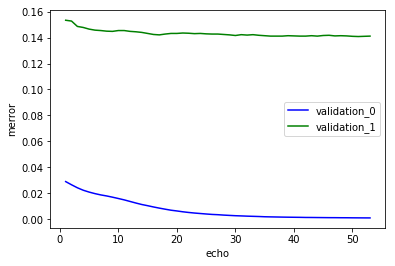

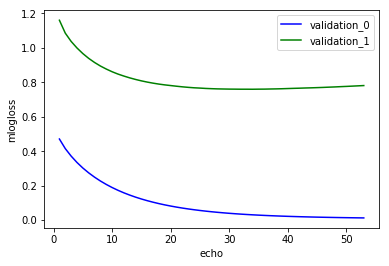

In [22]:
evals_result = clf.evals_result()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
# print(evals_result)

validation_0_key = list(evals_result.keys())[0]
metric_0_key = list(evals_result[validation_0_key].keys())[0]
n_round = len(evals_result[validation_0_key][metric_0_key])

x = list(range(1, n_round + 1))
for metric_key in evals_result[validation_0_key].keys():
    plt.xlabel('echo')
    plt.ylabel(metric_key)
    for i, val_key in enumerate(evals_result.keys()):
        plt.plot(x, evals_result[val_key][metric_key], colors[i])
    plt.legend(labels = list(evals_result.keys()), loc = 'best')
    plt.show()

## Predict

In [23]:
y_test_pred = clf.predict(y_test_probas_sta)
print(y_test_pred.shape)

(12652,)


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
%%time

# if statistics_type == 'val_mean':
#     max_indexes = np.argmax(y_test_proba_mean, -1)
# elif statistics_type == 'val_min':
#     max_indexes = np.argmax(y_test_proba_min, -1)
# elif statistics_type == 'val_max':
#     max_indexes = np.argmax(y_test_proba_max, -1)
# else: 
#     # statistics_type == 'val_median'
#     max_indexes = np.argmax(y_test_proba_median, -1)
# print(xg_test_pred.shape)

test_dict = {}
for pair in zip(test_filenames, y_test_pred):
    image_name, indx = pair[0], int(pair[1])
    image_name = image_name.split('/')[-1]
    image_id = int(image_name.split('.')[0])
#     print(pair[0], image_name, image_id, indx, indx+1, type(image_id), type(indx))
    test_dict[image_id] = indx + 1

#确认图片的id是否能与ImageDataGenerator()对应上
for name in test_filenames[:10]:
    image_name = name.split('/')[-1]
    image_id = int(image_name.split('.')[0])
#     print('%s\t%s\t%s' % (name, image_id, test_dict[image_id]))

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 13.4 ms


In [25]:
display(sample_submission_csv.head(2))

,id,predicted
0,1,57
1,2,74


In [26]:
%%time
len_sample_submission_csv = len(sample_submission_csv)
print('len(len_sample_submission_csv)=%d' % len_sample_submission_csv)
count = 0
for i in range(len_sample_submission_csv):
    image_id = int(sample_submission_csv.iloc[i, 0])
    if image_id in test_dict:
        pred_label = test_dict[image_id]
#         print('%s\t%s' % (image_id, pred_label))
        sample_submission_csv.iloc[i, 1] = pred_label
    else:
#         print('%s\t%s' % (image_id, 20))
        sample_submission_csv.iloc[i, 1] = 20 # 属于20的类最多，所以全都设置成这个类，可能会比设置成其他得到的结果好
    count += 1
    if count % 1000 == 0:
        print(int(count/1000), end=' ')
display(sample_submission_csv.head(2))

len(len_sample_submission_csv)=12800
1 2 3 4 5 6 7 8 9 10 11 12 

,id,predicted
0,1,12
1,2,71


CPU times: user 8.13 s, sys: 664 ms, total: 8.79 s
Wall time: 8.79 s


In [27]:
print(list(set(sample_submission_csv['predicted'])))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]


In [28]:
run_name_acc = run_name + '_' + str(int(ensemble_res[statistics_type]*10000)).zfill(4)
print(run_name_acc)

ic_furniture2018_Ensemble_XGBoostCPU_20180425_162619_8581


In [29]:
pred_file = os.path.join(output_folder, 'pred_%s.csv' % run_name_acc)
sample_submission_csv.to_csv(pred_file, index=None)

In [30]:
print('Time cost: %.2f s' % (time.time() - t0))
print(statistics_type)

print(run_name_acc)
print('Done !')

Time cost: 1988.45 s
val_max
ic_furniture2018_Ensemble_XGBoostCPU_20180425_162619_8581
Done !
